# Cyclistic Case Study

## Intro
The goal of this project is to gain insight into how casual riders and annual members differ in their usage of a bike-share company. Withing the company, the director of marketing believes that the company's future success depends on maximizing the number of annual memberships. Therefore, the insights found in this analysis will be used to design a digital marketing strategy aimed at converting casual riders into annual members. 

For the purpose of this study, **casual riders** are defined as customers who purchase single-ride or full-day passes, while **Cyclistic members** or **members** are customers who purchase an annual membership. 

In [1]:
# Importing data science libraries
import pandas as pd
import numpy as np
import glob
import os

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import missingno as msno
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('ggplot')

In [2]:
# Importing the data
path = 'data'
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [3]:
# Combining the data into a single data frame
df = pd.concat(dfs, ignore_index=True).drop_duplicates('ride_id') 

# Checking the combined data frame
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
5,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898124,-87.637533,41.921540,-87.653818,member
6,870B2D4CD112D7B7,electric_bike,2023-10-31 17:32:20,2023-10-31 17:44:20,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898177,-87.637549,41.921540,-87.653818,member
7,D9179D36E32D456C,classic_bike,2023-10-02 18:51:51,2023-10-02 18:57:09,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,casual
8,F8E131281F722FEF,classic_bike,2023-10-17 08:28:18,2023-10-17 08:50:03,Calumet Ave & 18th St,13102,Morgan St & Polk St,TA1307000130,41.857618,-87.619411,41.871737,-87.651030,member
9,91938B71748FA405,classic_bike,2023-10-17 19:17:38,2023-10-17 19:32:23,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871262,-87.673688,41.871737,-87.651030,member


In [4]:
# Getting some basic info on the data
df.shape

(5715482, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.5+ MB


In [6]:
# Converting `started_at` and `ended_at` to datetime format
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 610.5+ MB


In [7]:
# Converting the `member_casual` and `rideable_type` columns to categories
df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 534.2+ MB


In [8]:
# Sorting by datetime, most recent first, to check that data has been properly imported and merged.
df.sort_values('started_at', ascending = False).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1594323,7F02F9C9518DE899,electric_bike,2024-07-31 23:56:29.404,2024-07-31 23:59:06.026,Montrose Harbor,TA1308000012,NaN,NaN,41.963982,-87.638181,41.960000,-87.640000,member
1217211,D8EA77522CDD0963,electric_bike,2024-07-31 23:55:00.044,2024-07-31 23:58:09.805,Wilton Ave & Belmont Ave,TA1307000134,NaN,NaN,41.940232,-87.652944,41.950000,-87.650000,member
1098968,95217BF2C770F4DE,electric_bike,2024-07-31 23:54:26.535,2024-07-31 23:57:52.119,Stetson Ave & South Water St,TA1308000029,Cityfront Plaza Dr & Pioneer Ct,13427,41.886835,-87.622320,41.890573,-87.622072,casual
1028136,08C302BA8CA35FC2,electric_bike,2024-07-31 23:54:00.718,2024-07-31 23:55:50.961,State St & Chicago Ave,21544,NaN,NaN,41.896617,-87.628579,41.900000,-87.630000,casual
1253867,C4121F2D05CE827E,electric_bike,2024-07-31 23:53:36.244,2024-07-31 23:56:48.209,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.930000,-87.650000,casual
1351965,51A1A9F12078A3A9,electric_bike,2024-07-31 23:53:25.120,2024-07-31 23:57:01.391,Wells St & Elm St,KA1504000135,Wells St & Huron St,TA1306000012,41.903222,-87.634324,41.894722,-87.634362,casual
1627284,F150109CFA419D6E,electric_bike,2024-07-31 23:53:13.100,2024-07-31 23:59:00.637,NaN,NaN,Clark St & Lincoln Ave,13179,41.930000,-87.650000,41.915689,-87.634600,member
1050922,AF0F739C3F723C91,electric_bike,2024-07-31 23:52:35.503,2024-07-31 23:55:43.916,Halsted St & Wrightwood Ave,TA1309000061,NaN,NaN,41.929143,-87.649077,41.930000,-87.650000,member
1085365,5916FA2F813E5E74,electric_bike,2024-07-31 23:52:31.416,2024-07-31 23:55:21.415,Sheridan Rd & Irving Park Rd,13063,NaN,NaN,41.954245,-87.654406,41.960000,-87.650000,member
1655166,6441AE460141DB52,electric_bike,2024-07-31 23:52:14.182,2024-07-31 23:59:06.039,Clarendon Ave & Junior Ter,13389,Pine Grove Ave & Waveland Ave,TA1307000150,41.961004,-87.649603,41.949473,-87.646453,casual


## Cleaning the data
Next we will look for missing values and duplicates and figure out how to deal with them. 

In [9]:
# Checking if there are any missing values across each column
df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [10]:
# Showing how many missing values there are from each column
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    947002
start_station_id      947002
end_station_name      989396
end_station_id        989396
start_lat                  0
start_lng                  0
end_lat                 7716
end_lng                 7716
member_casual              0
dtype: int64

<Axes: >

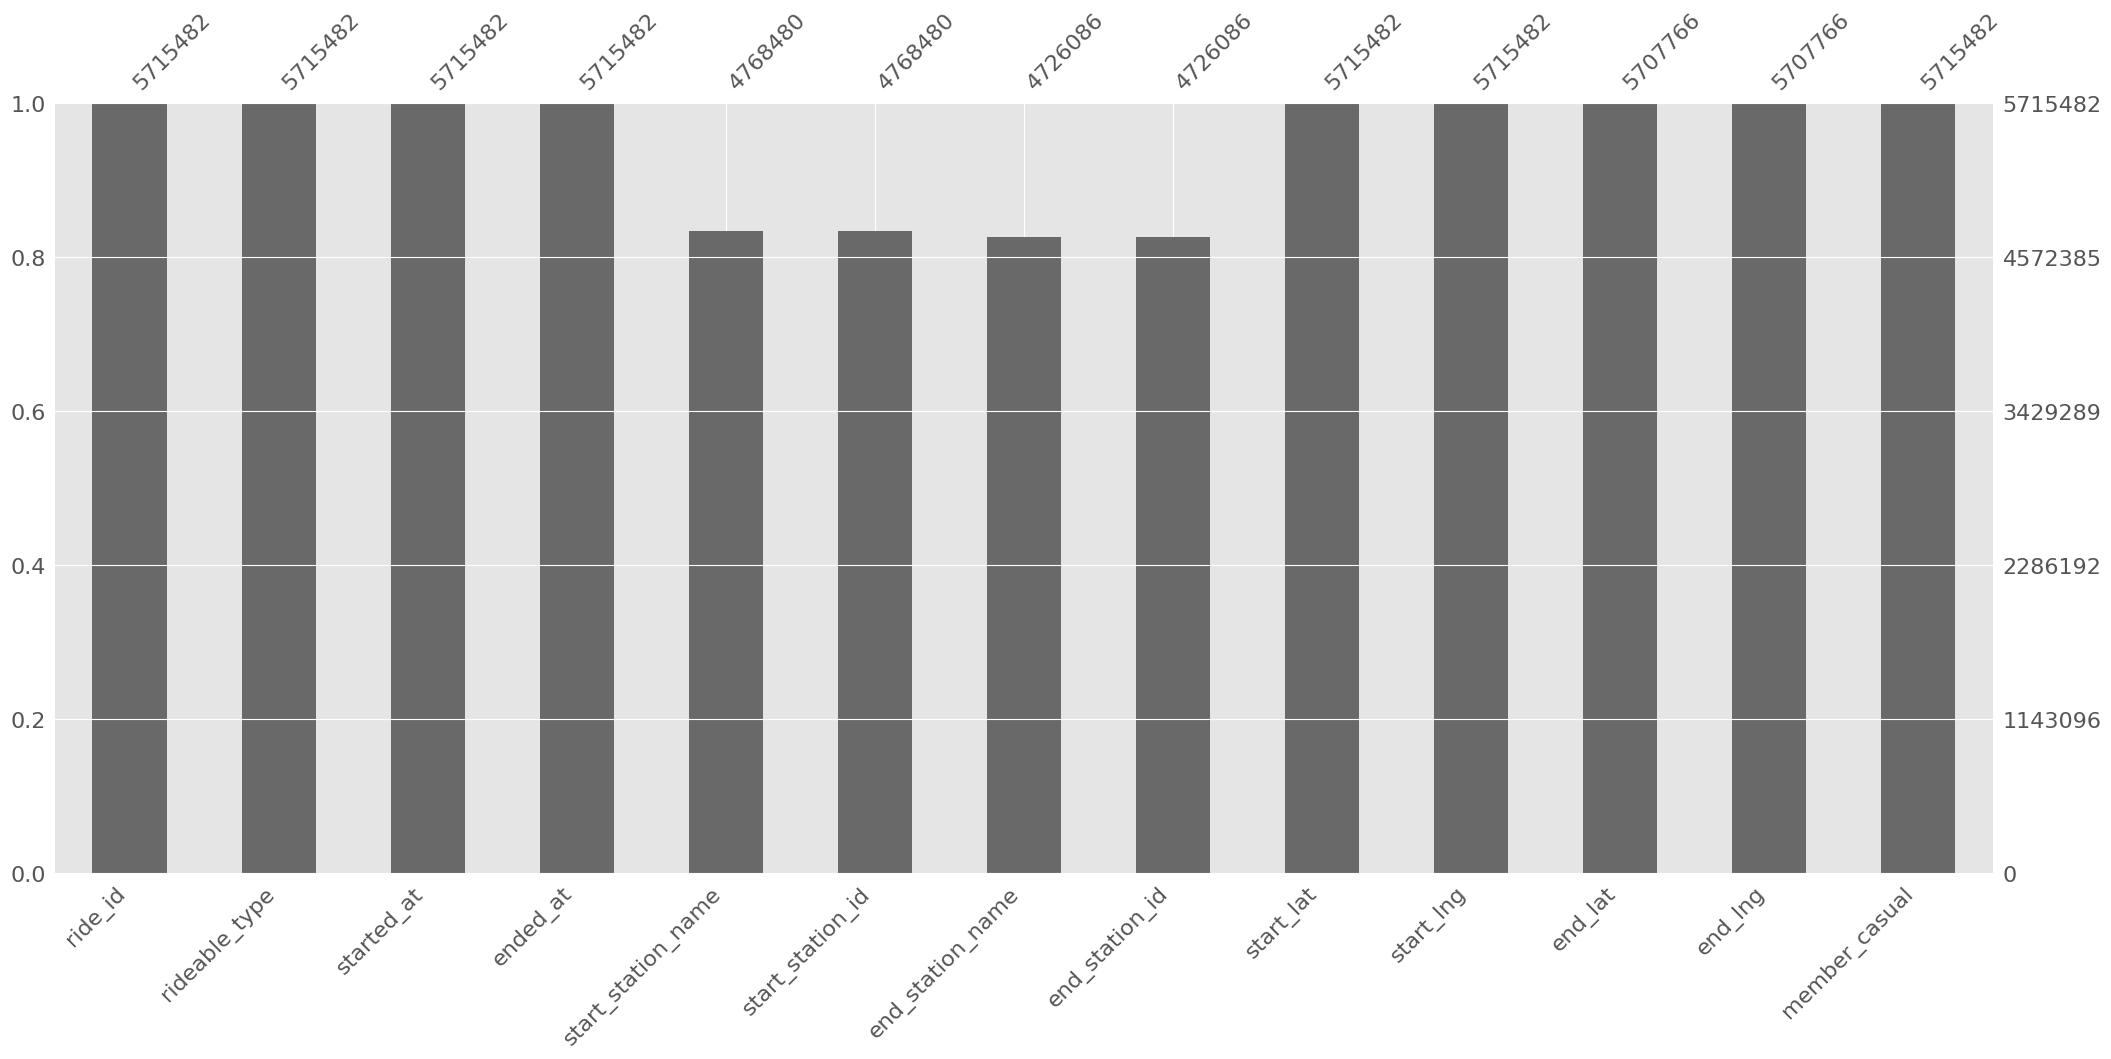

In [11]:
# A couple visualizations to show missing data
msno.bar(df)

<Axes: >

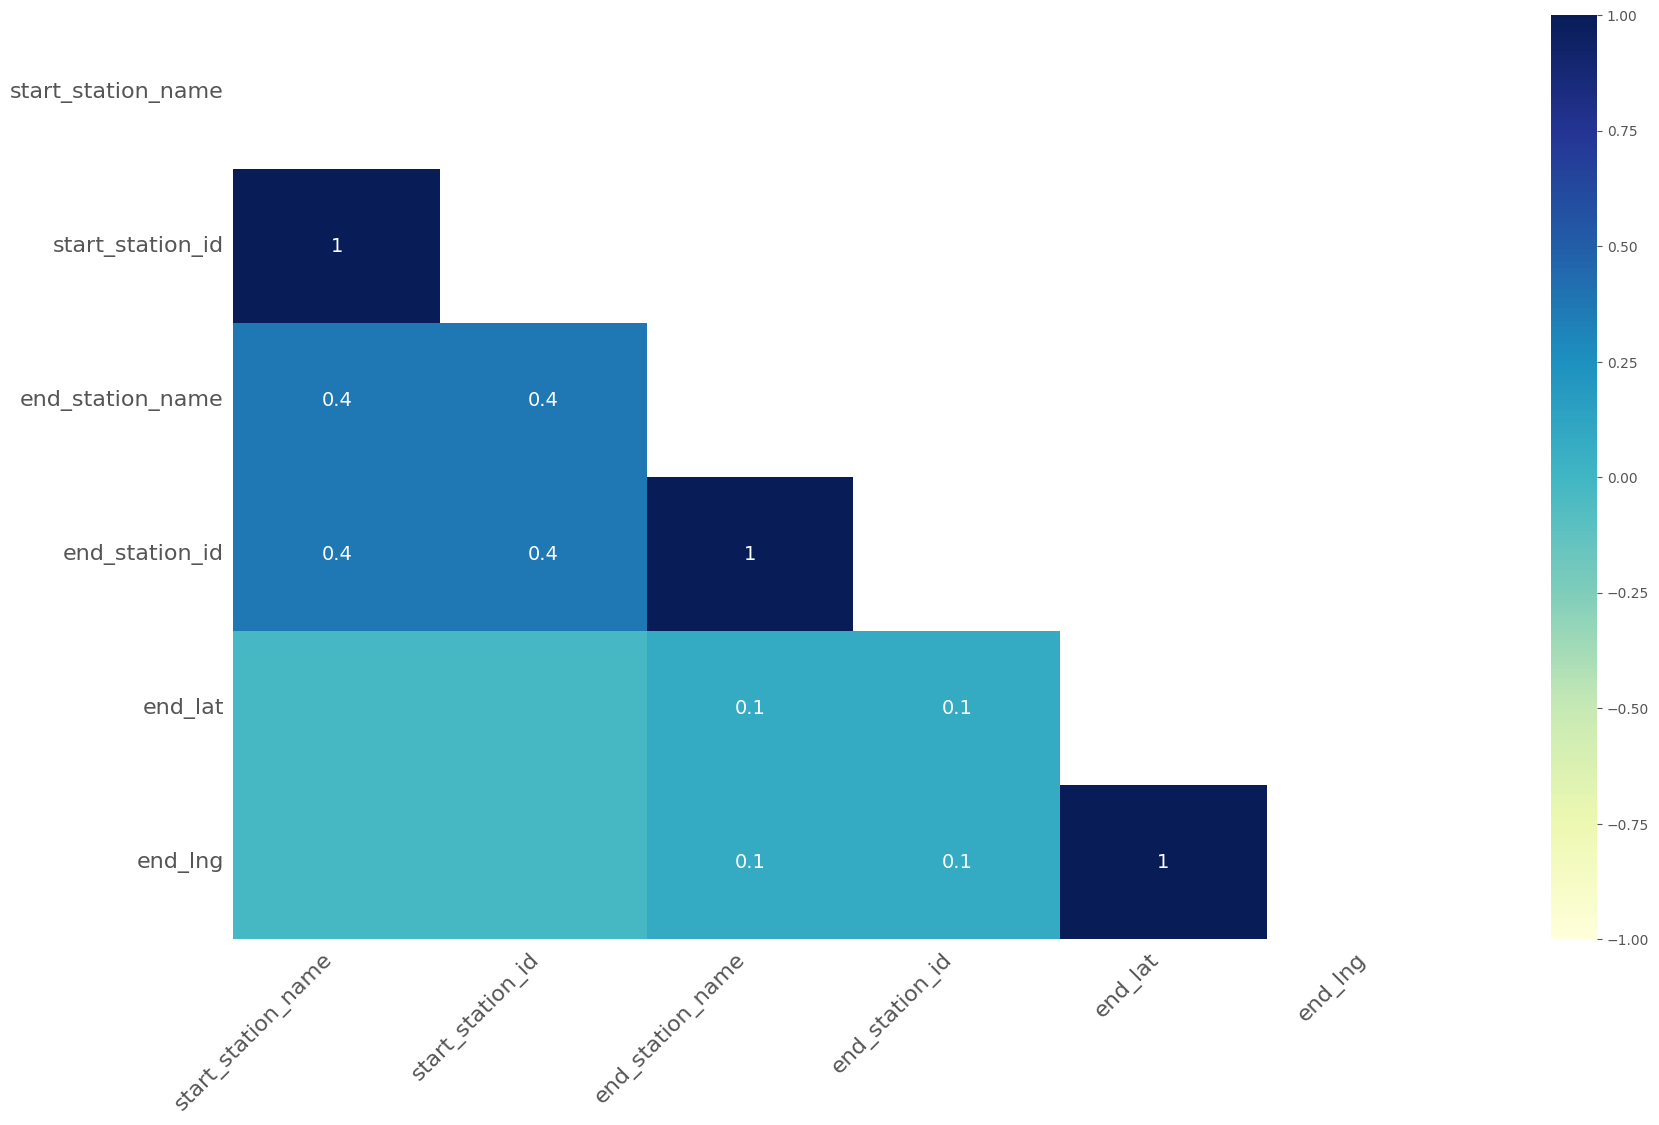

In [12]:
msno.heatmap(df, cmap='YlGnBu')

<Axes: >

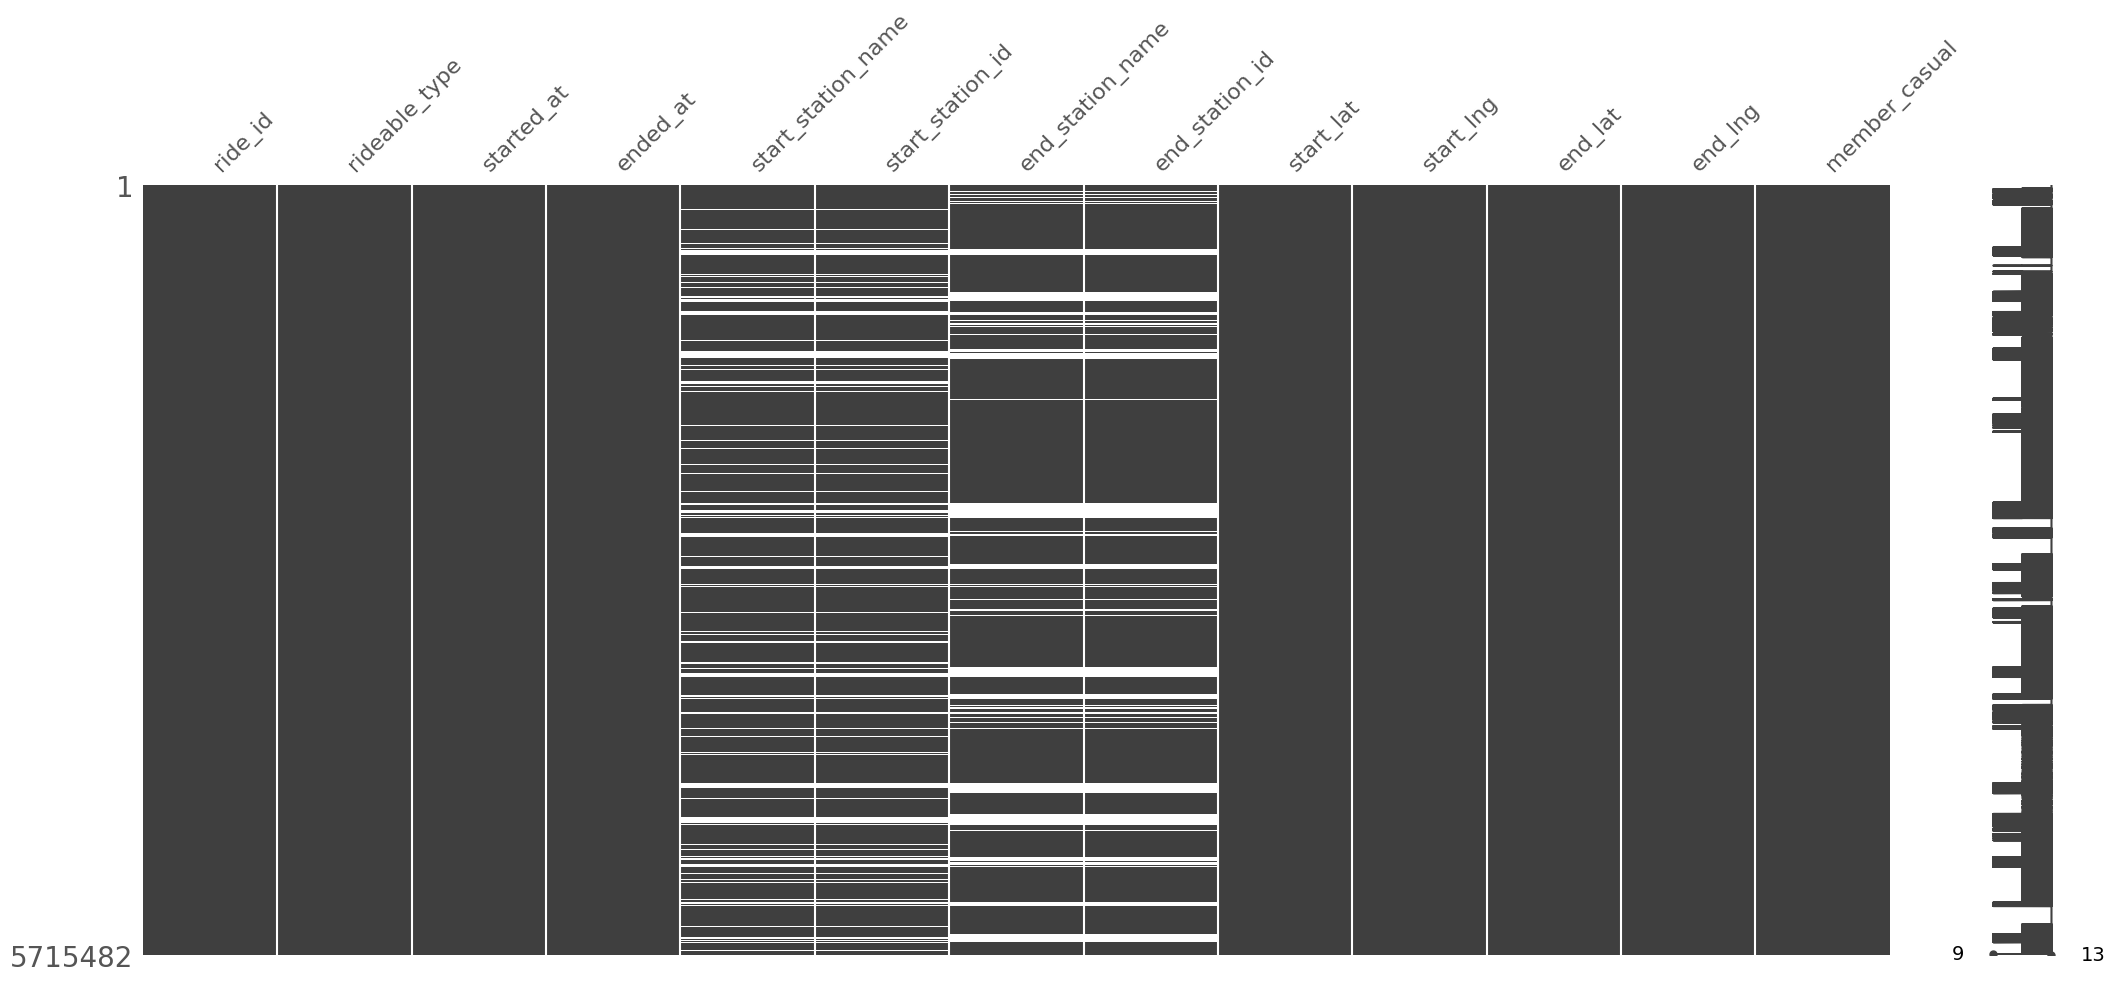

In [13]:
msno.matrix(df)

I'm going to start by replacing missing data with the hopes that it can still be used. I'll continue to investigate a bit here to decide if I need to remove the missing data instead.

In [14]:
# Replacing missing values
df['start_station_name'] = df['start_station_name'].fillna('Unknown')
df['start_station_id'] = df['start_station_id'].fillna('Unknown')
df['end_station_name'] = df['end_station_name'].fillna('Unknown')
df['end_station_id'] = df['end_station_id'].fillna('Unknown')

cd_u = df.loc[df['start_station_name'] == 'Unknown'].sample(n = 100)

cd_u.head(30)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3314040,06B6928939AB669D,electric_bike,2023-09-30 12:11:09.000,2023-09-30 12:35:27.000,Unknown,Unknown,Theater on the Lake,TA1308000001,41.89,-87.61,41.926277,-87.630834,casual
5591427,9B133B9C03B1C2BF,electric_bike,2023-11-12 14:07:48.000,2023-11-12 14:08:05.000,Unknown,Unknown,Unknown,Unknown,41.89,-87.61,41.890000,-87.610000,member
5218633,2DBAA2B391E21E95,electric_bike,2024-05-10 10:15:22.000,2024-05-10 10:23:28.000,Unknown,Unknown,Clark St & Berwyn Ave,KA1504000146,41.96,-87.66,41.978031,-87.668565,casual
946612,16ECE146F150A3DE,electric_bike,2024-04-06 17:46:36.000,2024-04-06 17:58:56.000,Unknown,Unknown,Unknown,Unknown,41.93,-87.65,41.940000,-87.690000,casual
2114245,61385B83949B8FE7,electric_bike,2023-08-21 17:41:49.000,2023-08-21 17:59:47.000,Unknown,Unknown,DuSable Lake Shore Dr & North Blvd,LF-005,41.94,-87.65,41.911722,-87.626804,casual
5070925,9051C9593CB3E388,electric_bike,2024-05-23 08:13:34.000,2024-05-23 08:34:14.000,Unknown,Unknown,Franklin St & Monroe St,TA1309000007,41.94,-87.66,41.880317,-87.635185,member
4385747,CD6218DC306CDEC4,electric_bike,2024-06-04 17:14:54.096,2024-06-04 17:52:13.974,Unknown,Unknown,Lincoln Ave & Waveland Ave,13253,41.89,-87.62,41.948797,-87.675278,member
3639779,F0009E051921B143,electric_bike,2023-09-16 22:13:58.000,2023-09-16 22:17:42.000,Unknown,Unknown,Unknown,Unknown,41.90,-87.63,41.910000,-87.630000,casual
2374699,B271B0231929291C,electric_bike,2023-08-09 18:59:59.000,2023-08-09 19:11:47.000,Unknown,Unknown,Unknown,Unknown,41.94,-87.65,41.910000,-87.620000,casual
3643852,16A48CC77C6F069A,electric_bike,2023-09-16 22:11:50.000,2023-09-16 22:13:38.000,Unknown,Unknown,Unknown,Unknown,41.86,-87.71,41.860000,-87.710000,casual


In [15]:
# Creating a geographic scatter plot to see if there is anyway to identify the missing station names based on their latitude and longitude. 
fig = px.scatter_geo(cd_u, lat='start_lat', lon='start_lng',
                     title='Unknown Start Station Name')
fig.show()

In [16]:
# Exploring start stations
df['start_station_name'].loc[df['start_station_name'] != 'Unknown'].value_counts()

start_station_name
Streeter Dr & Grand Ave                  63675
DuSable Lake Shore Dr & Monroe St        41624
Michigan Ave & Oak St                    38367
DuSable Lake Shore Dr & North Blvd       37837
Kingsbury St & Kinzie St                 35995
                                         ...  
Public Rack - Horner & 85th                  1
Public Rack - Princeton Ave & 99th Pl        1
Public Rack - Ewing Ave & 96th St S          1
Public Rack - Ashland Ave & 45th St          1
Public Rack - Pulaski & 84th                 1
Name: count, Length: 1705, dtype: int64

In [17]:
# Creating a time delta column to examine the length of each ride
d1 = df['started_at']
d2 = df['ended_at']

diff = d2-d1
df['duration'] = diff
df['duration'].head()

0   0 days 00:12:53
1   0 days 00:12:09
2   0 days 00:04:20
3   0 days 00:05:26
4   0 days 00:11:30
Name: duration, dtype: timedelta64[ns]

In [18]:
# Looking at the data with the new column added
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30


In [19]:
# Examining rides with the longest durations
df.nlargest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
2448719,992B647C22E22513,docked_bike,2023-08-02 19:27:12,2023-10-10 04:56:16,Campbell Ave & Montrose Ave,15623,Unknown,Unknown,41.961484,-87.692321,NaN,NaN,casual,68 days 09:29:04
1731692,24154619AEE96E2C,docked_bike,2023-08-03 22:06:08,2023-10-07 04:56:03,Broadway & Argyle St,13108,Unknown,Unknown,41.973815,-87.659660,NaN,NaN,casual,64 days 06:49:55
1831074,9EC4ACDAA96E516F,docked_bike,2023-08-07 12:16:36,2023-10-04 09:59:11,State St & Van Buren St,TA1305000035,Unknown,Unknown,41.877181,-87.627844,NaN,NaN,casual,57 days 21:42:35
2372946,ED31EE7C8024D292,docked_bike,2023-08-11 18:58:28,2023-10-06 04:33:29,Buckingham Fountain (Michigan/11th),15541,Unknown,Unknown,41.876423,-87.620339,NaN,NaN,casual,55 days 09:35:01
2406247,1A572575C18B600B,docked_bike,2023-08-15 15:19:32,2023-09-29 04:51:14,Shedd Aquarium,15544,Unknown,Unknown,41.867226,-87.615355,NaN,NaN,casual,44 days 13:31:42


In [20]:
# And the rides with the shortest durations
df.nsmallest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
5582375,F584D47AE67FD388,classic_bike,2023-11-05 21:08:17,2023-10-25 07:31:46,Sheffield Ave & Waveland Ave,TA1307000126,Unknown,Unknown,41.949288,-87.654462,41.95,-87.65,casual,-12 days +10:23:29
5620029,AE046C379C20B7CA,classic_bike,2023-11-05 20:46:59,2023-10-25 07:31:46,Sheridan Rd & Irving Park Rd,13063,Unknown,Unknown,41.954297,-87.654399,41.95,-87.65,member,-12 days +10:44:47
5599448,A21D6507DA3C5AD4,classic_bike,2023-11-05 16:41:54,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,Unknown,Unknown,41.954397,-87.648046,41.95,-87.65,member,-12 days +14:49:52
5595225,DEC5EF8DE27398A0,classic_bike,2023-11-05 11:56:19,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,Unknown,Unknown,41.954360,-87.648109,41.95,-87.65,casual,-12 days +19:35:27
5619167,7850F6E2343BF766,classic_bike,2023-11-01 16:38:10,2023-10-25 07:31:46,Clark St & Drummond Pl,TA1307000142,Unknown,Unknown,41.931195,-87.644212,41.93,-87.64,casual,-8 days +14:53:36


I'm realizing that the durations on these rides is very skewed. It seems unlikely that there were casual riders with rides that last days, up to 68, and impossible that anyone would have had a ride that lasted a negative amount of time. I'm noticing that all of these outlier records include an unknown start station and/or end station. So, I'm going to go ahead and drop rows with unknown values. In an ideal setting, I would have an engineer I could talk to about those records, but for the purpose of this study, I will proceed without those entries because they significantly skew the data I'm after.  

In [21]:
# Removing records with unknown start or end stations
df = df[df['start_station_name'] != 'Unknown']
df = df[df['end_station_name'] != 'Unknown']

#Checking how many entries are left in our cleaned data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241241 entries, 0 to 5715692
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  duration            timedelta64[ns]
dtypes: category(2), datetime64[ns](2), float64(4), object(5), timedelta64[ns](1)
memory usage: 428.7+ MB


In [22]:
# Rechecking longest durations
df.nlargest(15, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
1975383,47158A16C754A9F4,docked_bike,2023-08-10 22:17:49.000,2023-08-15 17:09:02.000,Larrabee St & Webster Ave,13193,Michigan Ave & Oak St,13042,41.921822,-87.644140,41.900960,-87.623777,casual,4 days 18:51:13
1772455,4031082BC503CC84,docked_bike,2023-08-02 17:28:57.000,2023-08-06 11:07:57.000,University Ave & 57th St,KA1503000071,Museum of Science and Industry,KA1503000074,41.791478,-87.599861,41.791728,-87.583945,casual,3 days 17:39:00
1778616,D2273A0F45CDD4CC,docked_bike,2023-08-18 09:13:48.000,2023-08-20 16:14:38.000,2112 W Peterson Ave,KA1504000155,Sheridan Rd & Loyola Ave,RP-009,41.991178,-87.683593,42.001044,-87.661198,casual,2 days 07:00:50
2896281,7A5CAAC52FAE9E95,classic_bike,2024-03-09 16:58:39.000,2024-03-10 18:08:01.000,Talman Ave & Addison St,15632,Talman Ave & Addison St,15632,41.946636,-87.694615,41.946636,-87.694615,casual,1 days 01:09:22
3697920,7AC23ADF3F785C89,classic_bike,2023-09-29 12:32:03.000,2023-09-30 13:29:57.000,Halsted St & 63rd St,KA1503000055,Halsted St & 63rd St,KA1503000055,41.779381,-87.644621,41.779381,-87.644621,casual,1 days 00:57:54
2635039,8AFD9583BC85E0DE,classic_bike,2024-02-01 17:28:26.000,2024-02-02 18:26:05.000,Benson Ave & Church St,596,Sheridan Rd & Noyes St (NU),604,42.048214,-87.683485,42.058239,-87.677432,member,1 days 00:57:39
5689334,2503BA4056C4C83B,classic_bike,2023-11-11 11:58:41.000,2023-11-12 12:56:11.000,Montrose Harbor,TA1308000012,Clark St & Leland Ave,TA1309000014,41.963982,-87.638181,41.967088,-87.667291,member,1 days 00:57:30
3767134,C65FD7B15C4C410F,classic_bike,2023-09-18 17:57:10.000,2023-09-19 18:54:33.000,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,member,1 days 00:57:23
2567996,D1B2433CCB28F892,classic_bike,2024-01-17 07:44:28.000,2024-01-18 08:41:47.000,Ellis Ave & 60th St,KA1503000014,Harper Ave & 59th St,KA1503000070,41.785097,-87.601073,41.787943,-87.588315,member,1 days 00:57:19
2059315,3309CF3DBCAD8E84,docked_bike,2023-08-20 19:43:06.000,2023-08-21 20:40:23.000,Prairie Ave & 43rd St,KA1503000027,Prairie Ave & 43rd St,KA1503000027,41.816659,-87.619412,41.816659,-87.619412,casual,1 days 00:57:17


In [23]:
# And smallest durations
df.nsmallest(15, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
5672272,5C5FCC49C148635F,classic_bike,2023-11-05 01:55:47,2023-11-05 01:01:13,Halsted St & Wrightwood Ave,TA1309000061,Halsted St & Roscoe St,TA1309000025,41.929143,-87.649077,41.943670,-87.648950,member,-1 days +23:05:26
5653865,274EDE47C11F43AF,classic_bike,2023-11-05 01:55:51,2023-11-05 01:02:37,Southport Ave & Wellington Ave,TA1307000006,Southport Ave & Wrightwood Ave,TA1307000113,41.935775,-87.663600,41.928773,-87.663913,casual,-1 days +23:06:46
5476914,0AF3917F317F4C5F,classic_bike,2023-11-05 01:54:43,2023-11-05 01:01:31,Halsted St & 21st St,13162,Racine Ave & 18th St,13164,41.853780,-87.646603,41.858166,-87.656495,casual,-1 days +23:06:48
5635588,D17C0701A2AC27A8,classic_bike,2023-11-05 01:53:49,2023-11-05 01:00:41,Halsted St & Wrightwood Ave,TA1309000061,Sedgwick St & Webster Ave,13191,41.929143,-87.649077,41.922167,-87.638888,member,-1 days +23:06:52
5432129,FBDEF92A65F125D9,classic_bike,2023-11-05 01:58:37,2023-11-05 01:05:42,LaSalle Dr & Huron St,KP1705001026,Clark St & Elm St,TA1307000039,41.894877,-87.632326,41.902973,-87.631280,casual,-1 days +23:07:05
5476903,C182738D5AF4775B,classic_bike,2023-11-05 01:54:15,2023-11-05 01:01:33,Halsted St & 21st St,13162,Racine Ave & 18th St,13164,41.853780,-87.646603,41.858166,-87.656495,casual,-1 days +23:07:18
5640924,822A055416791A8D,classic_bike,2023-11-05 01:55:07,2023-11-05 01:02:40,Larrabee St & Armitage Ave,TA1309000006,Sedgwick St & North Ave,TA1307000038,41.918084,-87.643749,41.911386,-87.638677,casual,-1 days +23:07:33
5647890,A2B29BF080FD1672,classic_bike,2023-11-05 01:55:41,2023-11-05 01:03:22,Damen Ave & Cortland St,13133,Campbell Ave & Fullerton Ave,15648,41.915983,-87.677335,41.924632,-87.689307,casual,-1 days +23:07:41
5652678,368C90D097E27F50,classic_bike,2023-11-05 01:54:53,2023-11-05 01:02:56,Larrabee St & Armitage Ave,TA1309000006,Clark St & Drummond Pl,TA1307000142,41.918084,-87.643749,41.931248,-87.644336,casual,-1 days +23:08:03
5679388,3FE1CB266FEFC4F8,classic_bike,2023-11-05 01:56:53,2023-11-05 01:06:00,Dearborn St & Erie St,13045,Ogden Ave & Chicago Ave,TA1305000020,41.893992,-87.629318,41.896362,-87.654061,member,-1 days +23:09:07


In [24]:
# Removing the remaining negative time durations
df = df[df['duration'] >= pd.Timedelta(0)]

#Confirming removal
df.nsmallest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
4523,008A3B92A7D34888,electric_bike,2023-10-10 16:00:26,2023-10-10 16:00:26,Canal St & Jackson Blvd,13138,Canal St & Jackson Blvd,13138,41.877243,-87.639385,41.877245,-87.639366,member,0 days
6762,1B2A2112D72AF3D9,electric_bike,2023-10-04 21:58:34,2023-10-04 21:58:34,Michigan Ave & 18th St,13150,Michigan Ave & 18th St,13150,41.857966,-87.624612,41.857813,-87.624550,casual,0 days
6832,B97A9E823BD1D734,electric_bike,2023-10-15 13:48:09,2023-10-15 13:48:09,Fairfield Ave & Roosevelt Rd,KA1504000102,Fairfield Ave & Roosevelt Rd,KA1504000102,41.866628,-87.694494,41.866624,-87.694521,member,0 days
7702,F76620719E2AC573,classic_bike,2023-10-30 18:55:50,2023-10-30 18:55:50,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936253,-87.652662,41.936253,-87.652662,member,0 days
9472,045ECA660D6195F7,classic_bike,2023-10-04 12:19:23,2023-10-04 12:19:23,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892278,-87.612043,41.892278,-87.612043,casual,0 days


In [25]:
# Looking at the number of events per rideable type
df['rideable_type'].loc[df['rideable_type'] != 'n/a'].value_counts()

rideable_type
classic_bike     2854413
electric_bike    1371248
docked_bike        15514
Name: count, dtype: int64

In [26]:
# Looking at the average ride time for members vs. casual riders
mc = df.groupby(df['member_casual'])
mc_duration = mc['duration'].mean()

print(mc_duration)

member_casual
casual   0 days 00:24:04.275697968
member   0 days 00:12:30.604388031
Name: duration, dtype: timedelta64[ns]


/var/folders/6h/n89x378s0rg8yhvjb1y_rgsc0000gn/T/ipykernel_2098/3331948931.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Observation #1
The average member pass ride is about half the time of the average casual pass ride. It is unfortunate that there is not a way to parse out the casual pass rides into daily and single-ride passes. However, we can learn from the data as it is  that members' rides are usually shorter than the casual rides. 

A suggestion based on this might be to implement some kind of charge per minute pricing structure on casual rides. Implementing a price per use + price per minute structure on casual rides and a price per day + price per minute structure on daily passes could cause more riders to choose the membership route. 

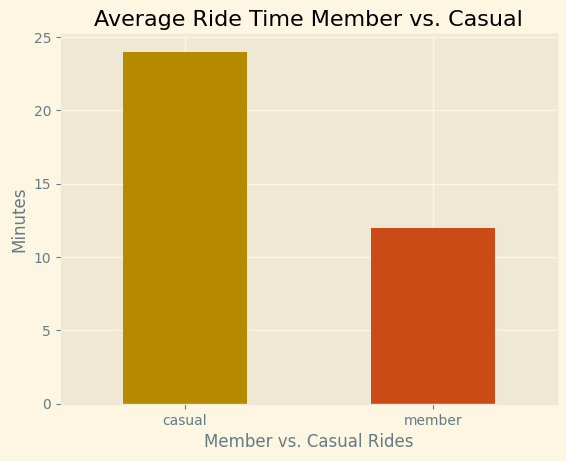

In [27]:
# Creating a bar chart to show the difference in average ride time
td = mc_duration/60000000000
plt.style.use('Solarize_Light2')
colors = ['#b58900', '#cb4b16', '#dc322f', '#d33682', '#6c71c4', '#268bd2', '#2aa198', '#859900']

ax = td.plot(kind='bar', title='Average Ride Time Member vs. Casual', xlabel = 'Member vs. Casual Rides', ylabel = 'Minutes', color = colors)
plt.xticks(rotation = 0)
plt.show()

In [28]:
# Now looking at the number of bike rental events for members vs. casual riders. 
df['member_casual'].value_counts()

member_casual
member    2750869
casual    1490306
Name: count, dtype: int64

## Observation #2
So we've found that the average ride time for casual riders is much higher than members, but we've now seen that the number of rental events for members is much higher than the number of casual rider rentals. 

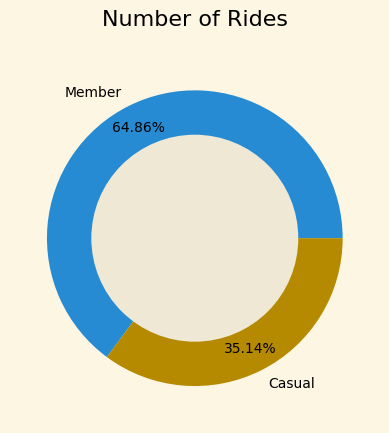

In [29]:
# Creating a pie chart to show the difference in number of rental events
pcount = df['member_casual'].value_counts()
labels = ['Member', 'Casual']

plt.style.use('Solarize_Light2')

plt.pie(x = pcount, labels = labels, autopct = '%1.2f%%', colors = ['#268bd2', '#b58900'], pctdistance=0.84)
plt.title(
    label = "Number of Rides", 
    fontdict = {"fontsize":16},
    pad = 20
)
centre_circle = plt.Circle((0,0),0.70,fc='#eee8d5')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

Based on this info, I would recommend a marketing campaign that focuses on the freedom of being able to ride wherever and whenever you want with the membership. Members get to ride more, take care of the environment and themselves, and only pay a low monthly price. Possibly finding a way to offer casual riders that ride more than once per month a discounted rate for their first few months. Unfortunately, the data I have here doesn't allow me to see if there are repeat riders, so I can parse out how many of them there are. 